# Framing the Problem and Data

In order to get a good idea about how we should get donors for DonorChoose.org re-engaged, we should get a better understanding of the data

In [2]:
library(data.table)
library(ggplot2)
library(scales)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

In [3]:
Donations <- fread('data/Donations.csv')
Donors <- fread('data/Donors.csv')
Projects <- fread('data/Projects.csv')
Resources <- fread('data/Resources.csv')
Schools <- fread('data/Schools.csv')
Teachers <- fread('data/Teachers.csv')

Read 4687884 rows and 7 (of 7) columns from 0.569 GB file in 00:00:27


Warning message in fread("data/Donors.csv"):
"Bumped column 5 to type character on data row 28151, field contains 'N2J'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE."

Read 1208651 rows and 15 (of 15) columns from 2.237 GB file in 00:00:44
Read 7210448 rows and 5 (of 5) columns from 0.763 GB file in 00:00:13


## Donations

Perhaps the most important information is the 'Donations' information. After all, this is how the money is made! Let's take a look.

In [4]:
head(Donations)

Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38
000009891526c0ade7180f8423792063,8cea27f0cc03f41f66aab96b284ae6a1,896c75c9b8d9a91c759746e566cd3f37,Yes,15.00,1,2016-06-04 17:58:55


In [ ]:
# Visualizing Donations over time
Donations[, `Donation Received Date` := anytime::anydate(`Donation Received Date`)]
Donation_by_day <- Donations[,.(Total_Donations = sum(`Donation Amount`)), by = `Donation Received Date`]
Donation_by_day[, Year := format(`Donation Received Date`, '%Y')]

In [17]:
print(paste0('Ratio of unique projects per donation: ' ,round(length(unique(Donations$`Project ID`)) / nrow(Donations),4)))
# length(unique(Donations$`Donation ID`)) / nrow(Donations)
print(paste0('Ratio of unique donors per donation: ', round(length(unique(Donations$`Donor ID`)) / nrow(Donations),4)))

[1] "Ratio of unique projects per donation: 0.1924"
[1] "Ratio of unique donors per donation: 0.4319"


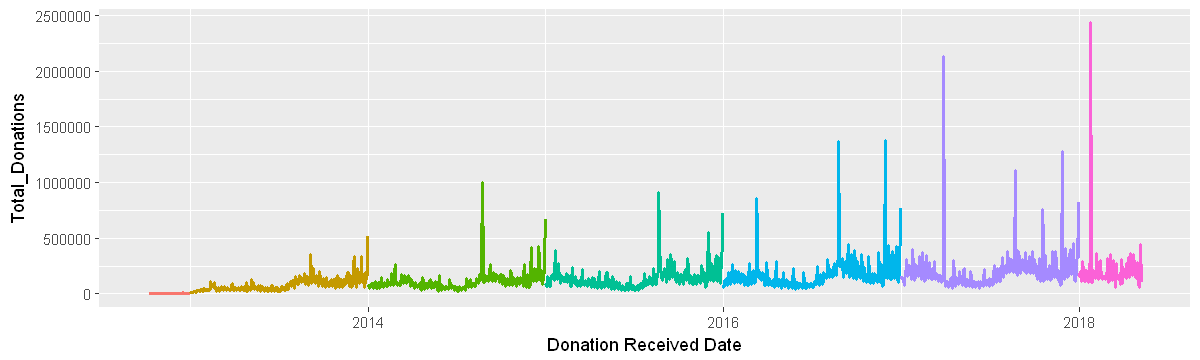

In [21]:
library(repr)
options(repr.plot.width=10, repr.plot.height=3)

ggplot(Donation_by_day, aes(`Donation Received Date`, Total_Donations)) +
  geom_line(size = 1, aes(color = Year)) +
  theme(legend.position="none")

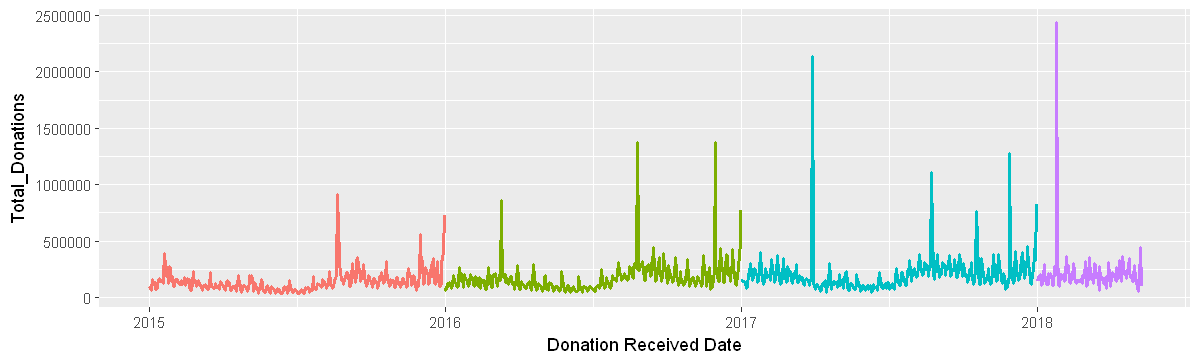

In [24]:
ggplot(Donation_by_day[`Year` >= 2015], aes(`Donation Received Date`, Total_Donations)) +
  geom_line(size = 1, aes(color = Year)) +
  theme(legend.position="none")

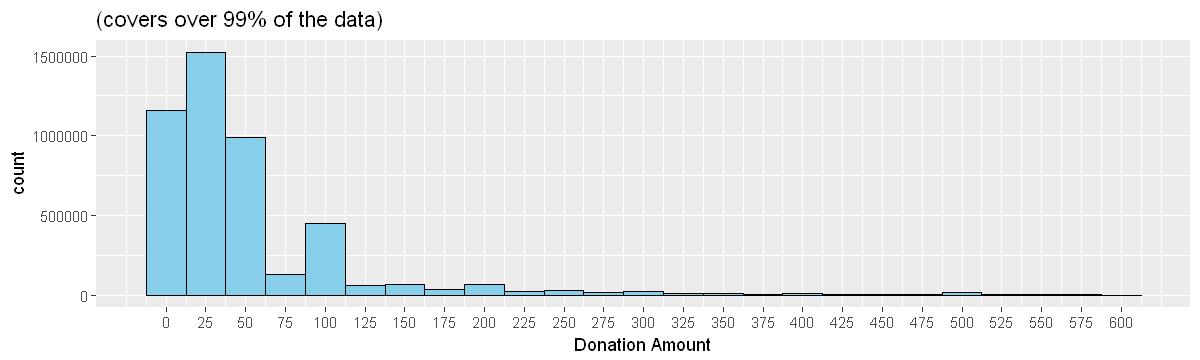

In [22]:
# nrow(Donations[`Donation Amount` < 600]) / nrow(Donations)

ggplot(Donations[`Donation Amount` < 600], aes(`Donation Amount`)) +
  geom_histogram(binwidth = 25, fill = 'skyblue', color = 'black') +
  scale_x_continuous(breaks = seq(0, 600, by = 25)) +
  labs(title = '(covers over 99% of the data)')

Now that we have an idea of the distribution of donations over time and amount, let's take a look the repeat donations

In [122]:
Repeated_Donors <- Donations[,.(`Times Donated`=.N, `Dollar Amount` = sum(`Donation Amount`)),by=`Donor ID`]

In [123]:
head(Repeated_Donors[order(-`Dollar Amount`)], 10)

Donor ID,Times Donated,Dollar Amount
a0e1d358aa17745ff3d3f4e4909356f3,10515,1879625.0
2144d56b1947ebb26a19e7f1d07c970a,2152,1243529.7
96c4f21513cd8962acb147ab384e6434,2148,1130565.6
3ba8a29e3dd72043f9738c0895733834,1553,977614.5
f9dd79ea006fee7bb4a5cc8473d8656c,1891,897408.3
d006be7223c048ae8b2bdedd7dd2b4db,3330,766000.7
bd58ba0b74427b6686b3d721f0cbcb6e,1126,695461.9
5f521d214a6297fe87b60f921bba51ab,669,569512.5
f4e59466422bf084792071a849284771,1580,463820.9
7f90cc03b021484df72d3fa18e42a151,327,336489.3


In [124]:
Repeated_Donors  <- Repeated_Donors[,.(`Number of People` = .N, `Dollar Worth` = sum(`Dollar Amount`)),  by = `Times Donated`]
Repeated_Donors[,`Dollar Per Individual` := `Dollar Worth`/`Number of People`]

In [125]:
head(Repeated_Donors[order(`Times Donated`)])

Times Donated,Number of People,Dollar Worth,Dollar Per Individual
1,1471613,78595864,53.40797
2,274902,33947995,123.49126
3,99063,19574818,197.59969
4,49911,13510249,270.68681
5,30578,10300913,336.87333
6,19665,8077697,410.76518


In [129]:
(123.49126- 53.40797) * 1471613
.2*53.40797*1471613

[1] 103135481

[1] 15719173

By using 'Dollar Per Individual' averages as an extremely rough benchmark, moving the 'Times Donated = 1' group into the 'Times Donated = 2' would net an additional 103 million dollars. Of course, this is not a scientific estimate given the unknown variations between those in the 'Times Donated = 1' group and the 'Times Donated = 2' group, but it goes to show how important re-engagement is.

If we get at least 20% of those who donated only once to make another donation with the same average donation, then we can get another 15 million dollars in revenue. 

In [73]:
print(paste0('The ratio of those who only donated once: ',Repeated_Donors[`Times Donated` == 1,`Number of People`]/Repeated_Donors[,sum(`Number of People`)]))
print(paste0('The dollar ratio of those who only donated once: ',Repeated_Donors[`Times Donated` == 1,`Dollar Worth`]/Repeated_Donors[,sum(`Dollar Worth`)]))
print('This means those who donated more than once (approx 28%) are responsible for around 73% of total revenue')

[1] "The ratio of those who only donated once: 0.726882562776789"
[1] "The dollar ratio of those who only donated once: 0.276348754183691"
[1] "This means those who donated more than once (approx 28%) are responsible for around 73% of total revenue"


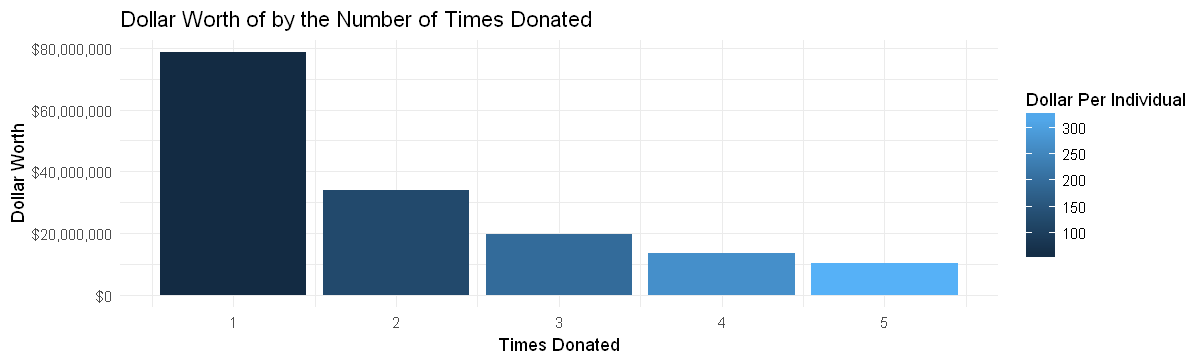

In [136]:
ggplot(Repeated_Donors[`Times Donated` <= 5], aes(x=`Times Donated`, y = `Dollar Worth`)) +
    geom_bar(stat = 'identity', aes(fill = `Dollar Per Individual`)) +
    scale_y_continuous(labels=dollar_format(prefix="$")) +
    scale_x_continuous(breaks = seq(0, 5, by = 1)) +
    labs(title = 'Dollar Worth of by the Number of Times Donated')

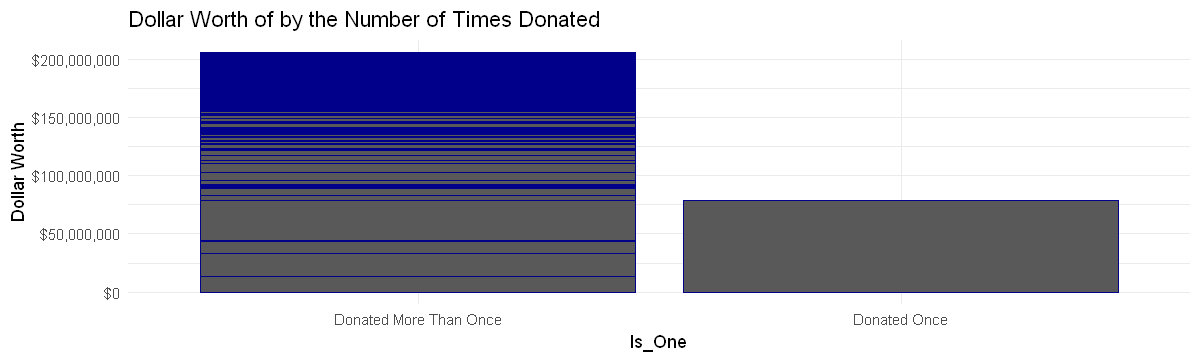

In [135]:
Repeated_Donors[,Is_One := ifelse(`Times Donated`== 1,'Donated Once','Donated More Than Once')]

ggplot(Repeated_Donors, aes(x=`Is_One`, y = `Dollar Worth`)) +
    geom_bar(stat = 'identity', color = 'darkblue') +
    scale_y_continuous(labels=dollar_format(prefix="$")) +
    labs(title = 'Dollar Worth of by the Number of Times Donated')